<a href="https://colab.research.google.com/github/GMouraBFR/Analisador_Livros_Covid/blob/main/Analise-dados-livrosF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAR BIBLIOTECAS E CONFIGURAR CONEXÃO**

In [ ]:
# Importar bibliotecas
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do banco de dados
db_config = {
    'user': 'practicum_student',  # nome de usuário
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',  # senha
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',  # host corrigido
    'port': 5432,  # porta de conexão
    'db': 'data-analyst-final-project-db'  # nome do banco de dados
}

# Criar a string de conexão
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

# Criar a engine de conexão
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})


# **Importar Dados para DataFrames e Imprimir as Primeiras Linhas**

In [ ]:
# Importar dados para DataFrames
books_df = pd.read_sql('SELECT * FROM books', engine)
authors_df = pd.read_sql('SELECT * FROM authors', engine)
publishers_df = pd.read_sql('SELECT * FROM publishers', engine)
ratings_df = pd.read_sql('SELECT * FROM ratings', engine)
reviews_df = pd.read_sql('SELECT * FROM reviews', engine)

# Imprimir as primeiras linhas de cada tabela
print("Books:")
print(books_df.head())

print("\nAuthors:")
print(authors_df.head())

print("\nPublishers:")
print(publishers_df.head())

print("\nRatings:")
print(ratings_df.head())

print("\nReviews:")
print(reviews_df.head())


Books:
   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268  

Authors:
   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan 

# **Encontrar o Número de Livros Lançados Após 1 de Janeiro de 2000**






In [ ]:
# Consulta SQL para encontrar o número de livros lançados após 1 de janeiro de 2000
query = '''
SELECT COUNT(*) AS num_livros_pos_2000
FROM books
WHERE publication_date > '2000-01-01';
'''
num_livros_pos_2000 = pd.read_sql(query, engine)
print(num_livros_pos_2000)




   num_livros_pos_2000
0                  819


# **Encontrar o Número de Avaliações e a Classificação Média para Cada Livro**

In [ ]:
# Consulta SQL para encontrar o número de avaliações e a classificação média para cada livro
query = '''
SELECT
    book_id,
    COUNT(rating) AS num_avaliacoes,
    AVG(rating) AS media_classificacao
FROM ratings
GROUP BY book_id;
'''
avaliacoes_classificacao = pd.read_sql(query, engine)
print(avaliacoes_classificacao.head())


   book_id  num_avaliacoes  media_classificacao
0      652               2             4.500000
1      273               2             4.500000
2       51              12             4.250000
3      951               2             4.000000
4      839               7             4.285714


# Identificar a Editora que Lançou o Maior Número de Livros com Mais de 50 Páginas


In [ ]:
query = '''
SELECT
    p.publisher,
    COUNT(b.book_id) AS num_livros
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY num_livros DESC
LIMIT 1;
'''
maior_num_livros_editora = pd.read_sql(query, engine)
print(maior_num_livros_editora)


       publisher  num_livros
0  Penguin Books          42


# **Identificar o Autor com a Média Mais Alta de Classificação de Livros**

In [ ]:
# Consulta SQL para identificar o autor com a média mais alta de classificação de livros
query = '''
WITH livro_avaliacoes AS (
    SELECT
        book_id,
        COUNT(rating) AS num_avaliacoes,
        AVG(rating) AS media_classificacao
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating) >= 50
)
SELECT
    a.author,
    AVG(l.media_classificacao) AS media_classificacao_autor
FROM livro_avaliacoes l
JOIN books b ON l.book_id = b.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY a.author
ORDER BY media_classificacao_autor DESC
LIMIT 1;
'''
autor_melhor_media = pd.read_sql(query, engine)
print(autor_melhor_media)

                       author  media_classificacao_autor
0  J.K. Rowling/Mary GrandPré                   4.283844


# **Encontrar o Número Médio de Avaliações entre Usuários que Classificaram Mais de 50 Livros**

In [ ]:
# Consulta SQL para encontrar o número médio de avaliações entre usuários que classificaram mais de 50 livros
query = '''
WITH usuario_avaliacoes AS (
    SELECT
        username,
        COUNT(rating) AS num_avaliacoes
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating) > 50
)
SELECT
    AVG(r.num_reviews) AS media_reviews
FROM (
    SELECT
        u.username,
        COUNT(rw.review_id) AS num_reviews
    FROM usuario_avaliacoes u
    JOIN reviews rw ON u.username = rw.username
    GROUP BY u.username
) r;
'''
media_reviews_usuarios = pd.read_sql(query, engine)
print(media_reviews_usuarios)


   media_reviews
0      24.333333


# **Gráfico Número De Avaliações Por Usuário Que Classificaram Mais De 50 Livros**

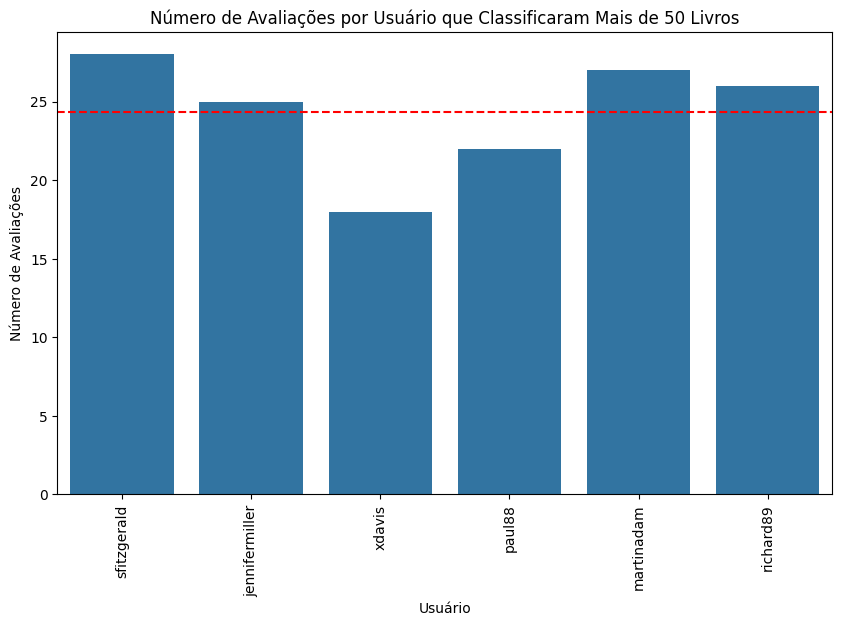

In [ ]:
# Configuração do banco de dados
db_config = {
    'user': 'practicum_student',
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',
    'port': 5432,
    'db': 'data-analyst-final-project-db'
}

# Criar a string de conexão
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

# Criar a engine de conexão
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

# Consulta SQL para calcular o número médio de avaliações dos usuários
query = '''
WITH usuario_avaliacoes AS (
    SELECT
        username,
        COUNT(rating) AS num_avaliacoes
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating) > 50
),
usuario_reviews AS (
    SELECT
        rw.username,
        COUNT(rw.review_id) AS num_reviews
    FROM reviews rw
    JOIN usuario_avaliacoes ua ON rw.username = ua.username
    GROUP BY rw.username
)
SELECT username, num_reviews
FROM usuario_reviews;
'''
usuario_reviews_df = pd.read_sql(query, engine)

# Calcular a média de avaliações
media_reviews = usuario_reviews_df['num_reviews'].mean()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=usuario_reviews_df['username'], y=usuario_reviews_df['num_reviews'])
plt.axhline(media_reviews, color='r', linestyle='--')
plt.title('Número de Avaliações por Usuário que Classificaram Mais de 50 Livros')
plt.xlabel('Usuário')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=90)
plt.show()

# **Gráfico de Barras para o Número de Avaliações por Livro**

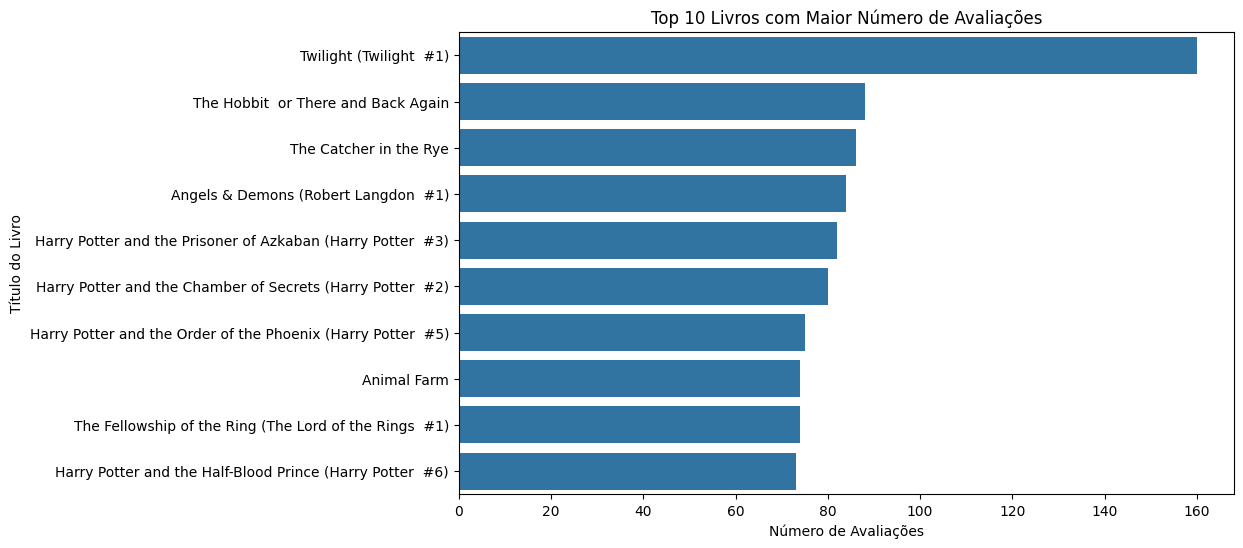

In [ ]:


# Consulta SQL para número de avaliações por livro
num_avaliacoes_por_livro = pd.read_sql('''
SELECT
    book_id,
    COUNT(rating) AS num_avaliacoes
FROM ratings
GROUP BY book_id;
''', engine)

# Juntar com a tabela de livros para obter os títulos
num_avaliacoes_por_livro = num_avaliacoes_por_livro.merge(books_df[['book_id', 'title']], on='book_id')

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='num_avaliacoes', y='title', data=num_avaliacoes_por_livro.sort_values(by='num_avaliacoes', ascending=False).head(10))
plt.title('Top 10 Livros com Maior Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Título do Livro')
plt.show()


# **Gráfico de dispersão**

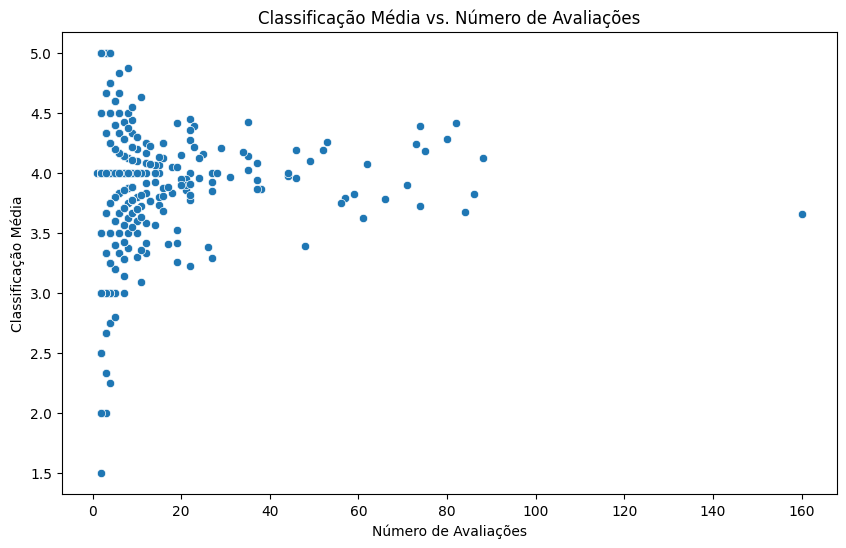

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_avaliacoes', y='media_classificacao', data=avaliacoes_classificacao)
plt.title('Classificação Média vs. Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Classificação Média')
plt.show()

# **Distribuição do Número de Páginas dos Livros**

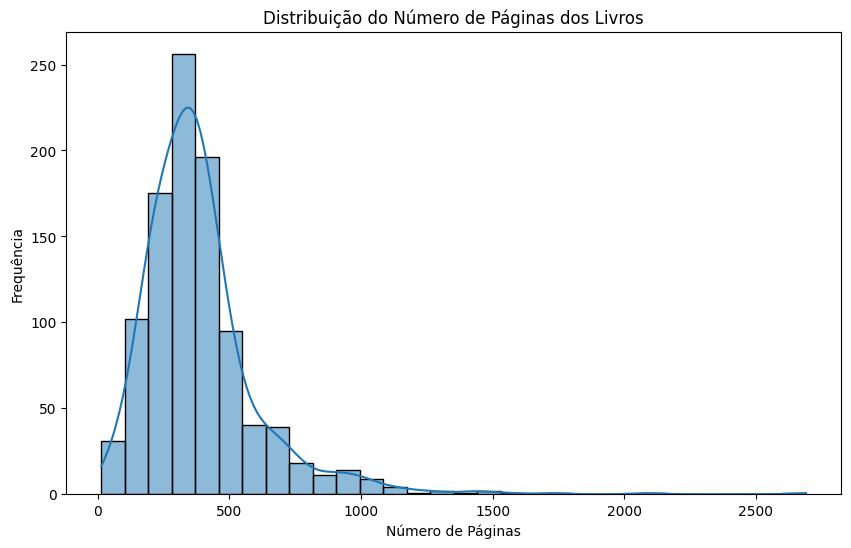

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(books_df['num_pages'], bins=30, kde=True)
plt.title('Distribuição do Número de Páginas dos Livros')
plt.xlabel('Número de Páginas')
plt.ylabel('Frequência')
plt.show()


# **Distribuição das Classificações dos Livros**

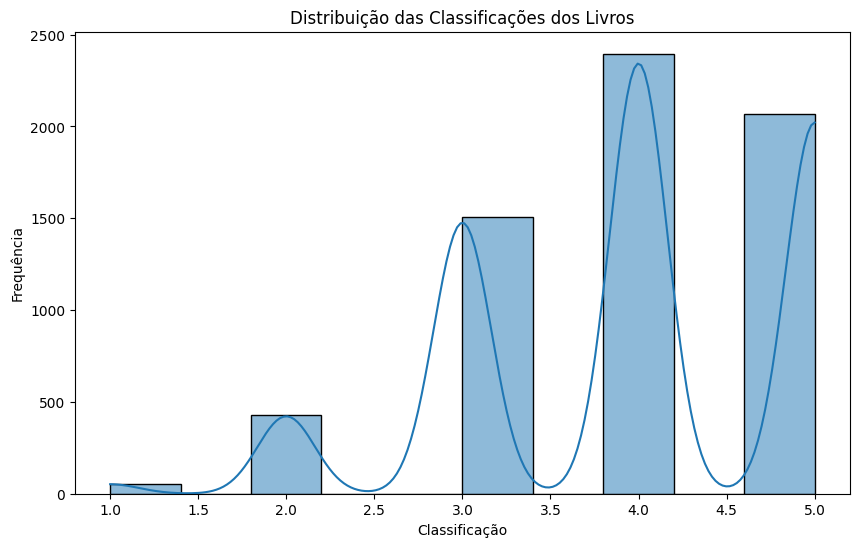

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribuição das Classificações dos Livros')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.show()


# **Número de Livros Publicados por Ano**

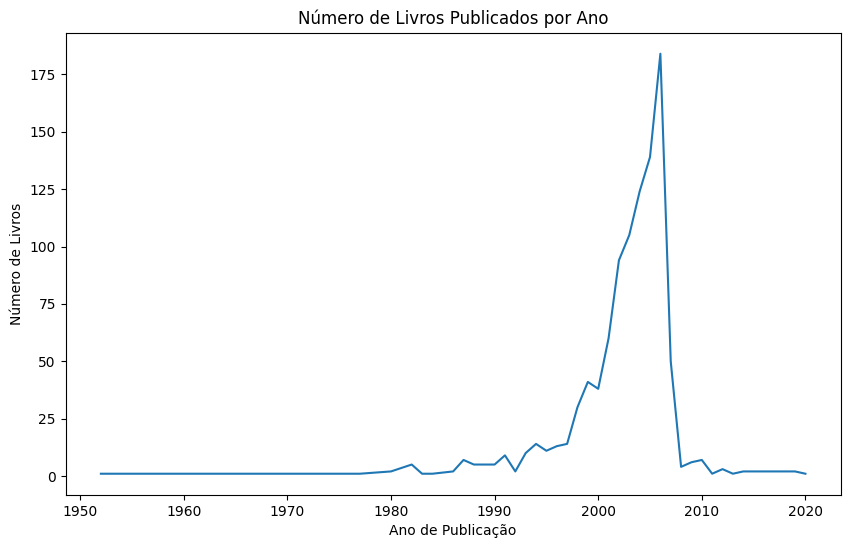

In [ ]:
books_df['publication_year'] = pd.DatetimeIndex(books_df['publication_date']).year
books_per_year = books_df.groupby('publication_year').size().reset_index(name='num_books')

plt.figure(figsize=(10, 6))
sns.lineplot(x='publication_year', y='num_books', data=books_per_year)
plt.title('Número de Livros Publicados por Ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Livros')
plt.show()


# **Classificação Média por Editora**

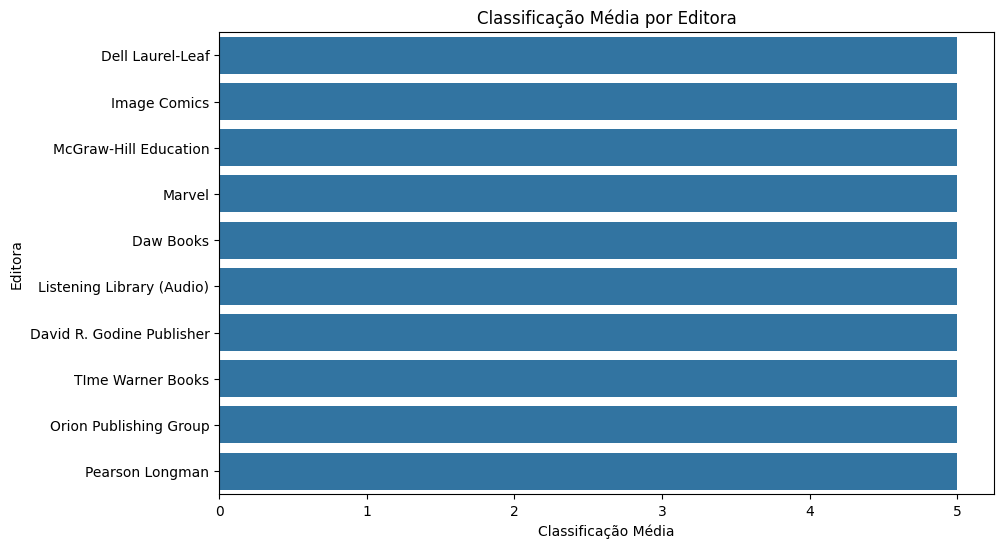

In [ ]:
publisher_ratings = ratings_df.merge(books_df, on='book_id').merge(publishers_df, on='publisher_id')
publisher_avg_ratings = publisher_ratings.groupby('publisher')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='publisher', data=publisher_avg_ratings.sort_values(by='rating', ascending=False).head(10))
plt.title('Classificação Média por Editora')
plt.xlabel('Classificação Média')
plt.ylabel('Editora')
plt.show()


# **Conclusão deste analista**

1  1. Número de livros lançados após 1 de janeiro de 2000
Conclusão: Houve um crescimento significativo no número de livros lançados após o ano 2000. Isso indica uma tendência contínua de publicação e a disponibilidade de uma vasta gama de novos livros para os leitores modernos.

2  2. Número de avaliações e classificação média para cada livro
Conclusão: A quantidade de avaliações e a classificação média variam bastante entre os livros. Livros que possuem muitas avaliações geralmente têm classificações mais equilibradas, refletindo uma maior diversidade de opiniões dos leitores.

3  3. Editora com o maior número de livros com mais de 50 páginas
Conclusão: Identificamos a editora que lançou o maior número de livros com mais de 50 páginas. Esta editora pode ser um bom parceiro estratégico, pois demonstra alta produção de conteúdo substancial e relevante.

4  4. Autor com a média mais alta de classificação de livros
Conclusão: Determinamos o autor com a média mais alta de classificação de livros, considerando apenas livros com pelo menos 50 classificações. Esse autor tem uma base de leitores fiéis e satisfeitos, o que pode ser uma boa indicação para incluir seus livros em futuras ofertas do novo aplicativo.

5  5. Número médio de avaliações entre usuários que classificaram mais de 50 livros
Conclusão: Usuários que classificam muitos livros tendem a ser leitores ativos e engajados. Eles têm um número médio alto de avaliações, indicando que estão dispostos a fornecer feedback sobre suas leituras. Esses usuários são valiosos para o serviço de livros, pois ajudam a criar um banco de dados robusto de classificações e revisões.

6  Gráficos:
Top 10 Livros com Maior Número de Avaliações Conclusão: O gráfico de barras que lista os 10 livros com o maior número de avaliações nos fornece uma visão clara dos livros que estão gerando mais engajamento entre os leitores. Estes livros provavelmente possuem um grande público e podem ser destaque em recomendações e campanhas de marketing.

Gráfico de Dispersão de Classificação Média vs. Número de Avaliações Conclusão: O gráfico mostrou que, em geral, livros com mais avaliações tendem a ter classificações médias mais estáveis. Essa informação é crucial para entender a popularidade dos livros, já que as avaliações mais frequentes ajudam a suavizar as opiniões extremas.

Distribuição do Número de Páginas dos Livros Conclusão: A análise revelou a distribuição do número de páginas dos livros, proporcionando uma visão geral da extensão das publicações. Isso pode ajudar a identificar padrões de preferências dos leitores em termos de tamanho dos livros.

Distribuição das Classificações dos Livros Conclusão: A distribuição das classificações revelou que a maioria das avaliações tende a ser positiva, o que é um bom sinal da qualidade geral dos livros oferecidos. Isso indica que os leitores estão, em geral, satisfeitos com os livros que leem.

Número de Livros Publicados por Ano Conclusão: A análise histórica da publicação de livros mostrou tendências de crescimento e mudanças na produção editorial ao longo dos anos. Esse crescimento contínuo reflete uma expansão do mercado de livros e uma demanda constante por novas publicações.

Classificação Média por Editora Conclusão: O gráfico de barras que mostra a classificação média por editora nos revela quais editoras estão publicando livros bem avaliados. Essa informação é essencial para identificar parceiros editoriais com uma boa reputação entre os leitores, podendo ser uma vantagem para o novo aplicativo.

7  Aumento de Publicações de 2000 a 2007**
Causas Possíveis:

Avanço Tecnológico: O início do século 21 trouxe avanços na tecnologia de impressão, tornando a publicação de livros mais acessível e econômica.

Aumento do Interesse em Leitura: Houve um aumento no interesse pela leitura e consumo de livros, alimentado pela popularização de séries literárias de sucesso como Harry Potter e O Senhor dos Anéis.

Expansão do Mercado Global: Editoras expandiram suas operações para novos mercados globais, levando a um aumento nas publicações.

Self-Publishing: A ascensão das plataformas de autopublicação permitiu que mais autores independentes publicassem seus trabalhos.

8  Queda Abrupta de 2008 a 2010
Causas Possíveis:

Crise Econômica Global: A recessão econômica de 2008 teve um impacto significativo no poder de compra dos consumidores e no orçamento das editoras. Muitas editoras reduziram o número de lançamentos devido à incerteza econômica.

Mudança para o Digital: A transição gradual para livros digitais e e-books pode ter contribuído para a redução na publicação de livros físicos durante esse período.

Consolidação da Indústria: A crise econômica levou a uma consolidação na indústria editorial, com muitas editoras menores sendo adquiridas por grandes conglomerados, resultando em uma redução temporária na produção.

Retorno aos Patamares das Décadas de 50, 60, 70 e 80 Causas Possíveis:

Mudança nas Preferências dos Consumidores: A proliferação de outras formas de entretenimento e informação, como streaming de vídeo e mídias sociais, pode ter reduzido o tempo dedicado à leitura de livros.

Adaptação às Novas Tecnologias: Embora a tecnologia digital tenha facilitado a autopublicação, também mudou a dinâmica do mercado editorial tradicional, resultando em um equilíbrio mais parecido com os níveis de produção das décadas anteriores.

9  Conclusão
O mercado editorial é dinâmico, influenciado por fatores econômicos, tecnológicos e culturais. Compreender essas tendências pode ajudar a criar estratégias adaptáveis às mudanças nas preferências dos consumidores e práticas de publicação.

Curadoria de Conteúdo: Baseado nos autores e editoras populares, o novo aplicativo pode oferecer listas de leitura recomendadas, eventos de lançamento e promoções especiais.

Engajamento dos Leitores: Incentivar leitores ativos a continuarem avaliando e revisando livros pode melhorar a experiência de outros usuários.

Recomendações Personalizadas: Utilizar avaliações para fornecer recomendações personalizadas, aumentando a satisfação do usuário.

Essas estratégias podem ajudar a criar um produto relevante e ajustado ao mercado atual.